In [11]:
from scipy.io import wavfile
from pesq import pesq
import os
from os import listdir
from pydub import AudioSegment
from scipy.io.wavfile import read, write
from IPython.display import Audio
import matplotlib.pyplot as plt
from pydub import AudioSegment, effects 
import random
from pydub.silence import split_on_silence
import numpy as np
import tqdm
import pandas as pd
import time

import pickle
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import wave

In [12]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from pydub import AudioSegment, silence
import librosa

In [ ]:
# !pip install pyAudioAnalysis
# !pip install eyed3
# !pip install pydub
# !pip install hmmlearn
# !pip install --user imblearn
#!pip install plotly

In [14]:
# shows the sound waves
def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='red')
    plt.show()

In [15]:
files=['../speech.wav']

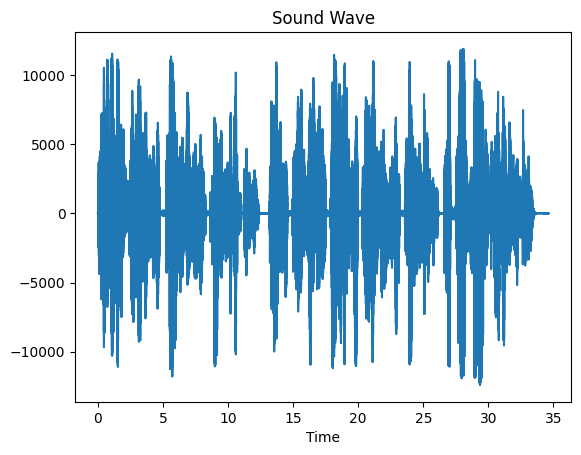

In [16]:
for file in files:
    visualize(file)

In [17]:
import librosa

def update_segments(filename,segments, sil_time):
    '''
    filename= audio file path
    segments= Active segment output from pyaudoanalysis
    sil_time = Silence time/ Time threshold above which silence to be considered

    returns:
    list of start and end of silent time frames
    '''
    ans=[]
    tmp=0
    n=len(segments)
    for  idx,t in enumerate(segments):
        if t[0]-tmp>=sil_time:
            ans.append((tmp,t[0]))
        tmp=t[1]
        if idx==n-1:
            fn=librosa.get_duration(filename=filename)
            if fn-tmp>=sil_time:
                ans.append((tmp,fn))
    return ans


In [18]:
for file in files:
    [Fs, x] = aIO.read_audio_file(file)
    segments = aS.silence_removal(x, 
                                 Fs, 
                                 0.020, 
                                 0.020, 
                                 smooth_window=1.0, 
                                 weight=0.3, 
                                 plot=False)
    u_segments=update_segments(file,segments, 5)
    print(u_segments)
    if len(u_segments)>0:
        visualize(file,u_segments)

[]


/var/folders/nl/_hqrc8z95cgc_t3dd6d5sxrm0000gq/T/ipykernel_90955/729203235.py:20: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  fn=librosa.get_duration(filename=filename)


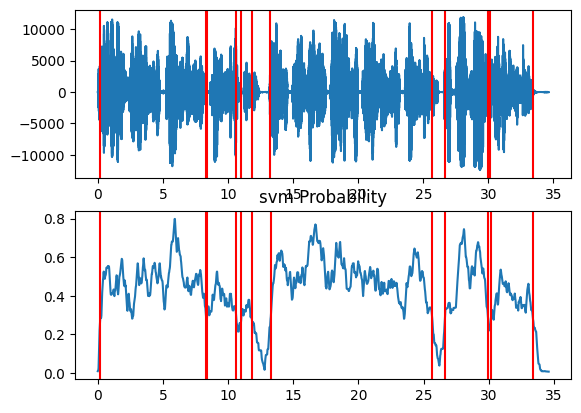

In [25]:
#import required libraries
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

# path to audio file
path=files[0]

# below method returns the active / non silent segments of the audio file 
[Fs, x] = aIO.read_audio_file(path)
segments = aS.silence_removal(x, 
                             Fs, 
                             0.020, 
                             0.020, 
                             smooth_window=0.8, 
                             weight=0.3, 
                             
                             plot=True)